In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:\\Users\\bida22-068\\Downloads\\churn_real.xlsx")
df.head() 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
print("Before conversion:")
print(df['Total Charges'].dtype) 
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
 
# After conversion
print("After conversion:")
print(df['Total Charges'].dtype)

Before conversion:
object
After conversion:
float64


In [4]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [5]:
# excluding the count row
desc_stats = df.describe().drop('count')

# styler object for the DataFrame
styler = desc_stats.style

# Apply specific styling to the DataFrame
styler.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#28a745'), ('color', 'white'), ('text-align', 'center')]},  # Custom header style with green
    {'selector': 'td, th', 'props': [('text-align', 'center')]},  # Center-align text in data cells and header cells
    {'selector': 'tbody tr', 'props': [('background', '#e8f5e9')]},  # Soft green background for all rows
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#c8e6c9')]}  # Slightly darker green on hover for all rows
])
   
# Display the enhanced summary statistics
styler


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
mean,1.000000,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.000000,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.000000,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.000000,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.000000,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.000000,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


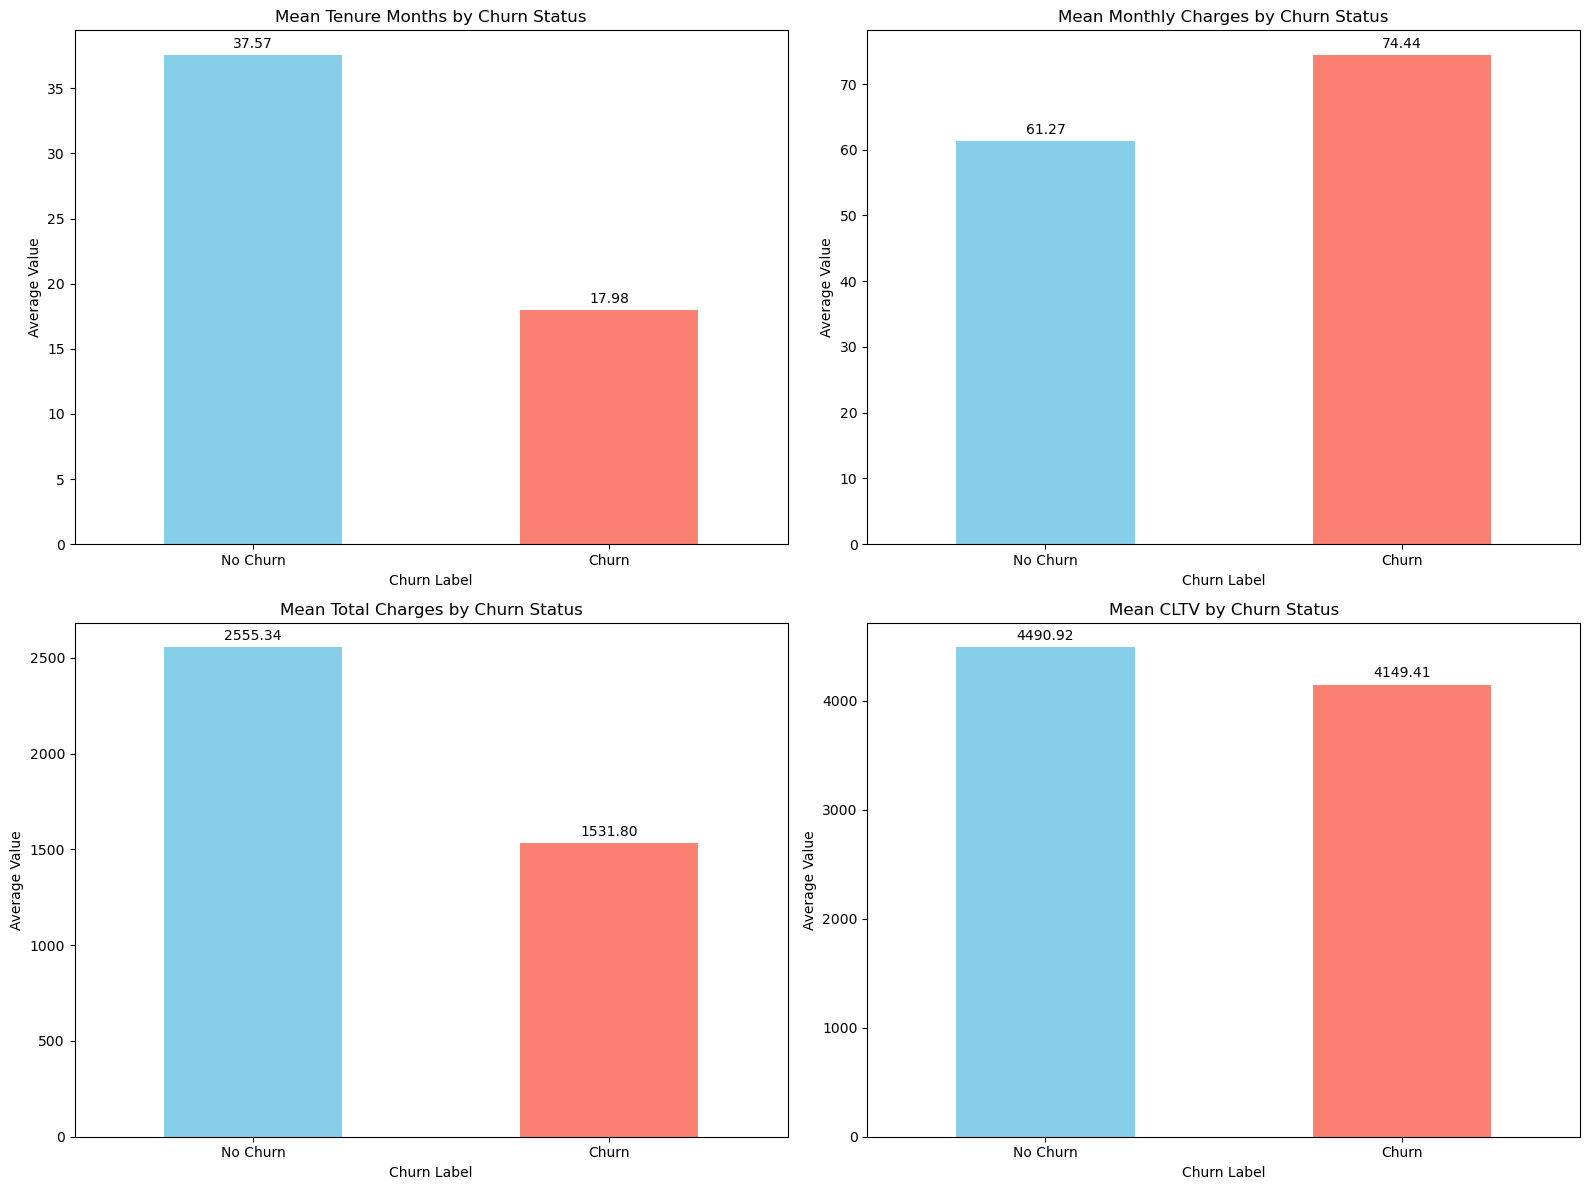

In [6]:
# Define the relevant numeric features for churn analysis
numeric_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Calculating mean values for each category of churn for each numeric feature
churn_means = df.groupby('Churn Label')[numeric_features].mean()

# Setting up the matplotlib figure with appropriate subplots layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for subplots

# Plotting each numeric feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 2, i % 2]  # Access the correct subplot in the grid
    churn_means[feature].plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], width=0.5)  # Adjusting bar width
    ax.set_title(f'Mean {feature} by Churn Status')
    ax.set_ylabel('Average Value')
    ax.set_xlabel('Churn Label')  # Set x-axis label to 'Churn Label'
    ax.set_xticklabels(['No Churn', 'Churn'], rotation=0)

    # Adding data labels on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')


plt.tight_layout()
plt.show()

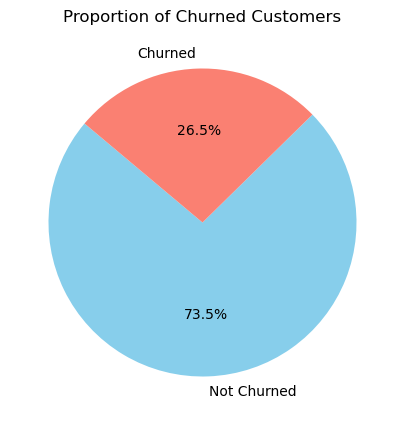

In [7]:
churn_counts = df['Churn Value'].value_counts()
churn_counts.index = ['Not Churned', 'Churned'] if churn_counts.index[0] == 0 else ['Churned', 'Not Churned']

plt.figure(figsize=(7, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Proportion of Churned Customers')
plt.show()

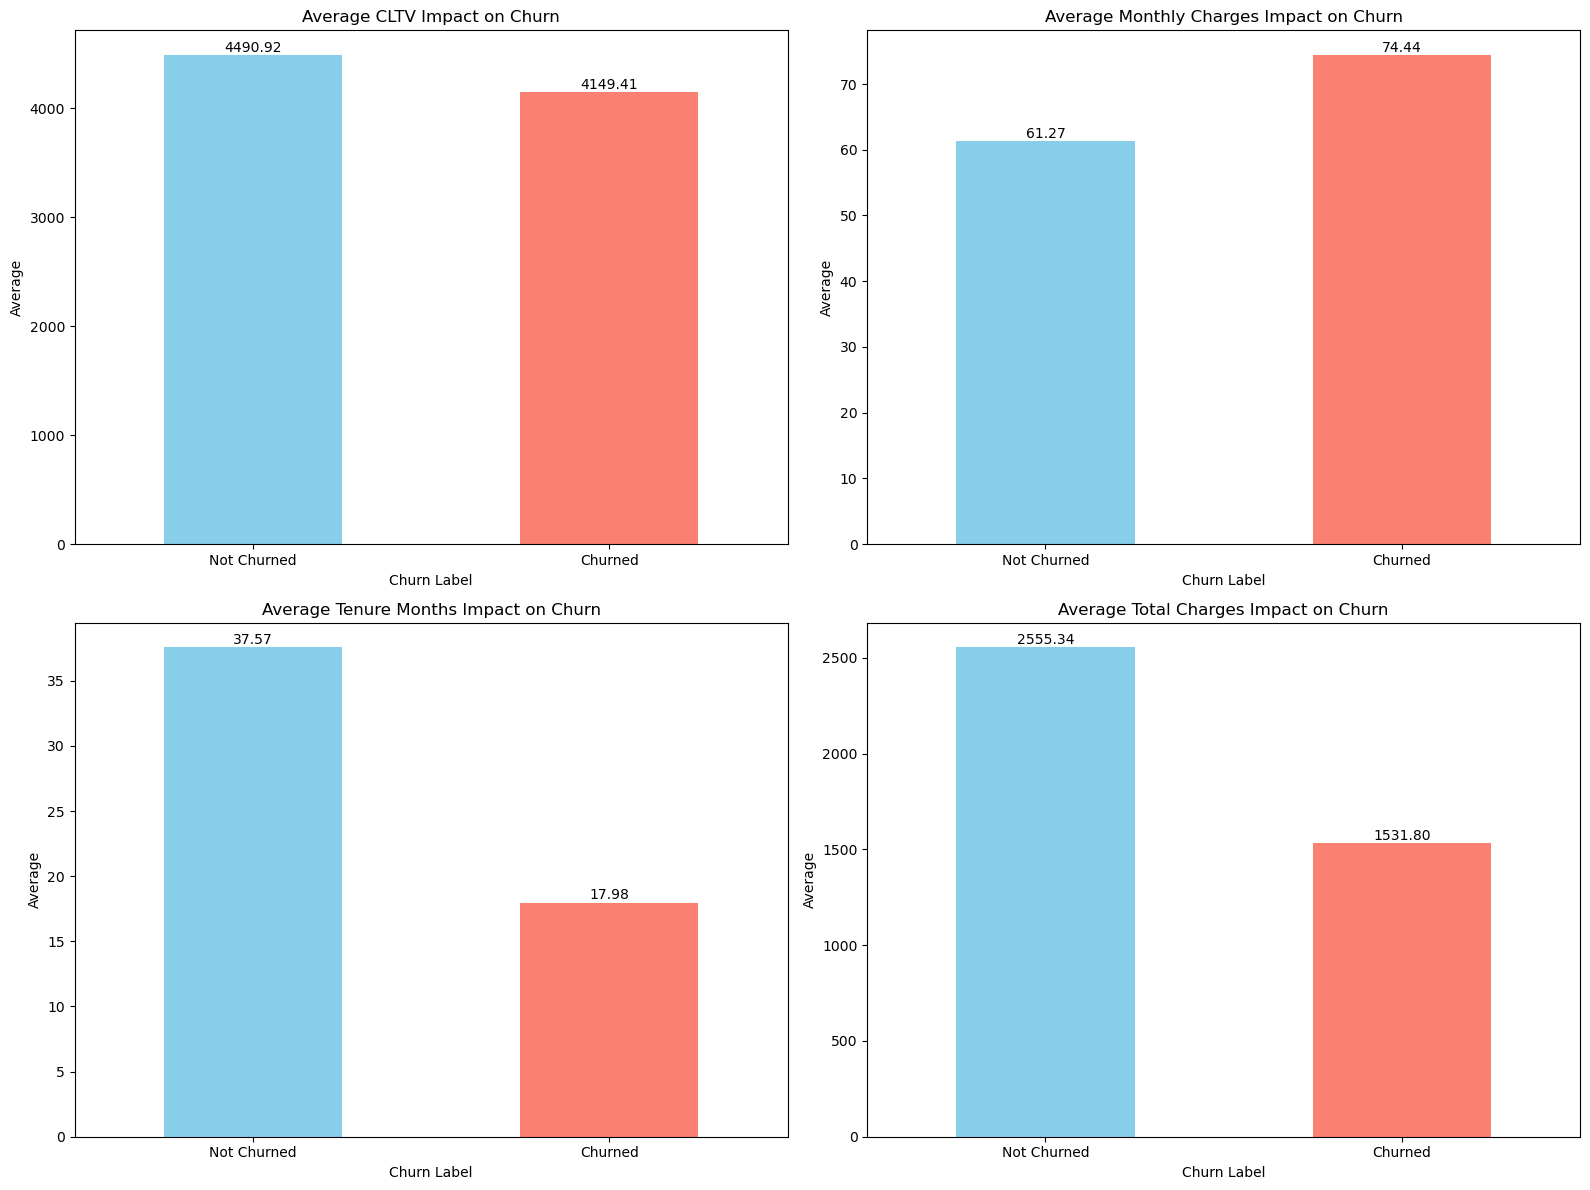

In [8]:
# Exclude non-relevant numeric columns
exclude_columns = ["CustomerID", "Count", "Latitude", "Longitude", "Churn Value", "Churn Score", "Zip Code"]
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

# Calculate average impact on churn for each numeric feature
avg_churn_impact = df.groupby('Churn Label')[numeric_columns].mean()

# Generate multiple bar plots in a subplot arrangement
num_plots = len(numeric_columns)
num_rows = (num_plots + 1) // 2  # Ensure at least 2 columns for better layout
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
fig.subplots_adjust(hspace=0.8)

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Plot the bar chart
    bars = avg_churn_impact[column].plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])
    
    # Add data labels above the bars
    for bar in bars.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
    
    # Customize bar labels
    ax.set_title(f'Average {column} Impact on Churn')
    ax.set_ylabel('Average')
    ax.set_xlabel('Churn Label')
    ax.set_xticklabels(['Not Churned', 'Churned'], rotation=0)

# Adjust layout if there's an odd number of plots
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()


In [9]:
churn_reason_counts = df['Churn Reason'].value_counts(dropna=True)
churn_reason_df = pd.DataFrame({
    'Counts': churn_reason_counts,
    'Percentage': churn_reason_counts / churn_reason_counts.sum() * 100
})

churn_reason_df['Percentage'] = churn_reason_df['Percentage'].apply(lambda x: f'{x:.2f}%')

print(churn_reason_df)

                                           Counts Percentage
Attitude of support person                    192     10.27%
Competitor offered higher download speeds     189     10.11%
Competitor offered more data                  162      8.67%
Don't know                                    154      8.24%
Competitor made better offer                  140      7.49%
Attitude of service provider                  135      7.22%
Competitor had better devices                 130      6.96%
Network reliability                           103      5.51%
Product dissatisfaction                       102      5.46%
Price too high                                 98      5.24%
Service dissatisfaction                        89      4.76%
Lack of self-service on Website                88      4.71%
Extra data charges                             57      3.05%
Moved                                          53      2.84%
Limited range of services                      44      2.35%
Long distance charges   

In [10]:
missing_values = df.isnull().sum()

print(missing_values)

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [11]:
mode_value = df['Total Charges'].mode()[0]

df['Total Charges'].fillna(mode_value, inplace=True)

# Verify the changes
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


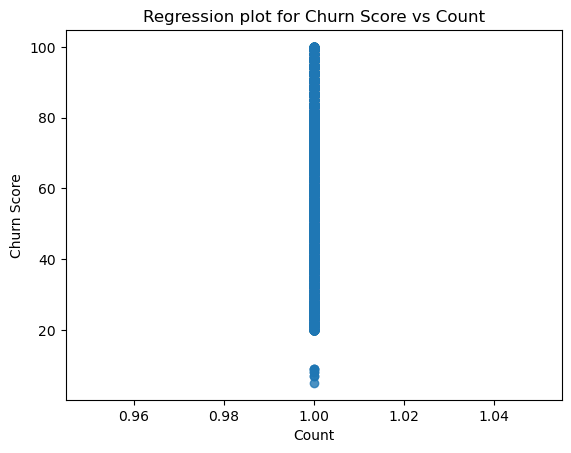

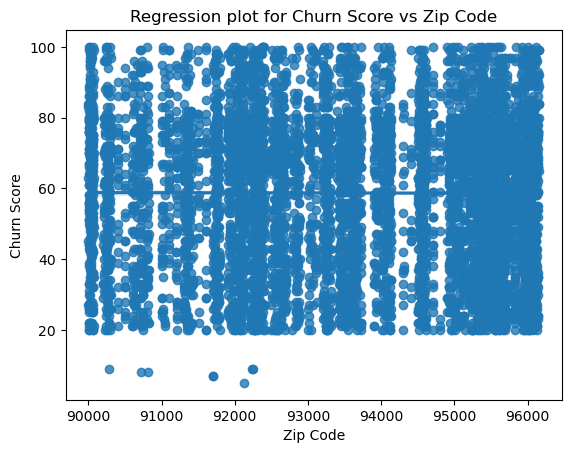

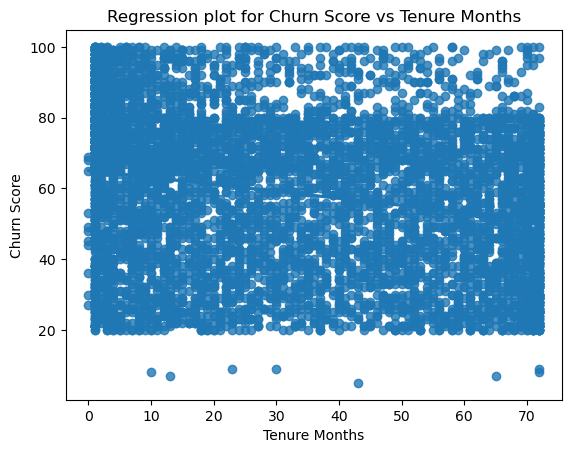

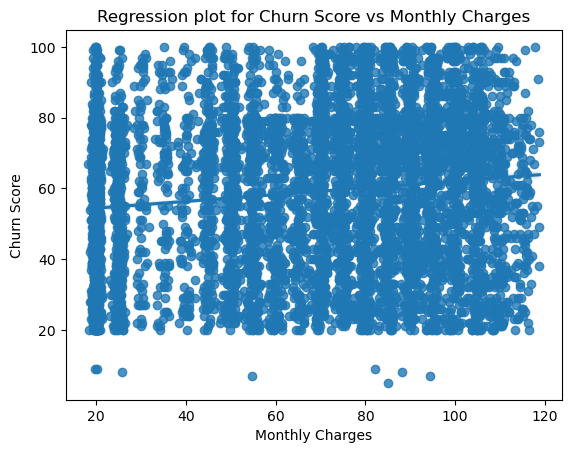

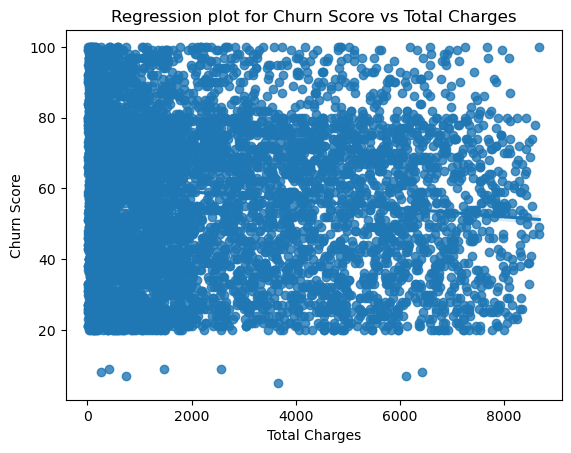

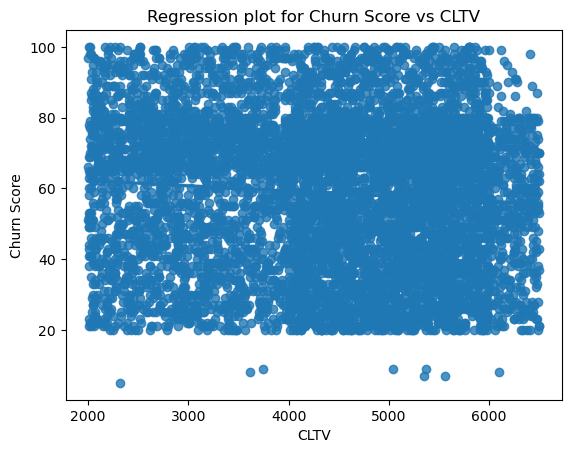

C:\Users\bida22-068\AppData\Local\Temp\ipykernel_34556\2267226540.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=column, hue='Churn Label', fill=True)


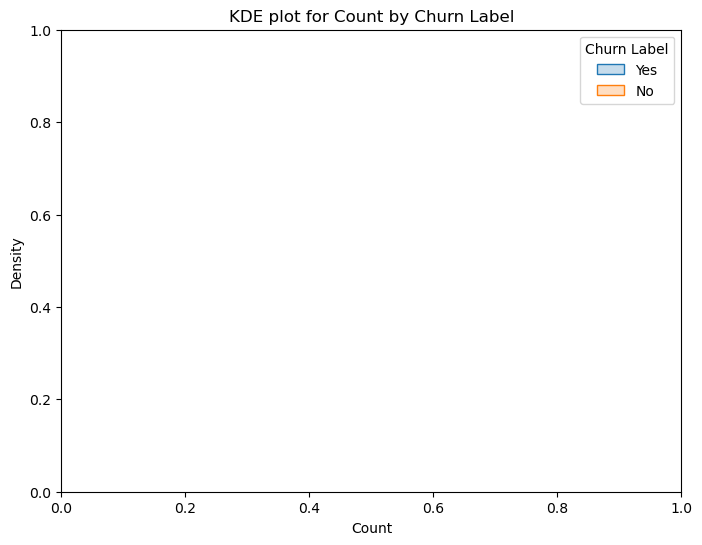

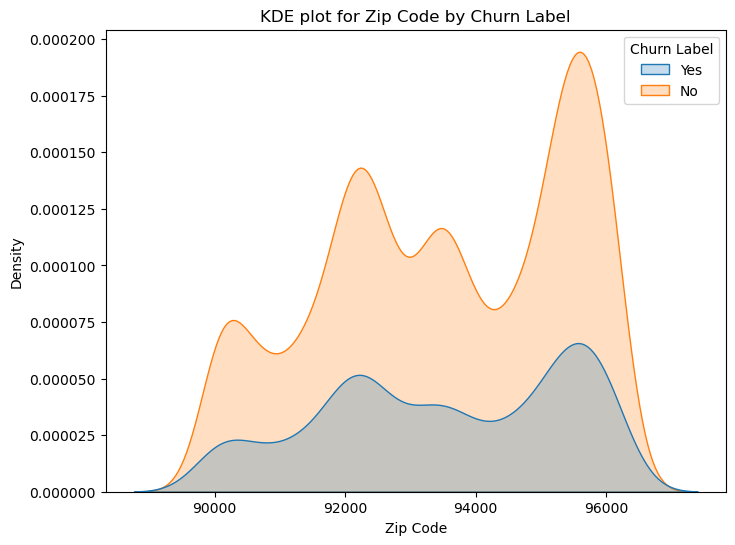

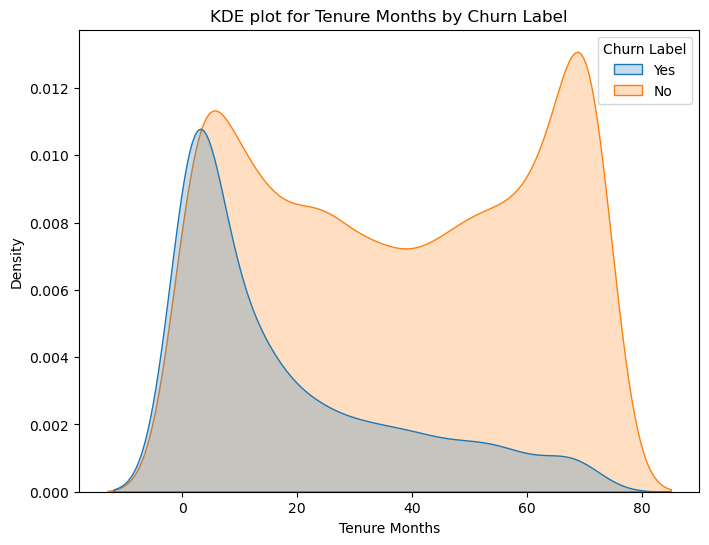

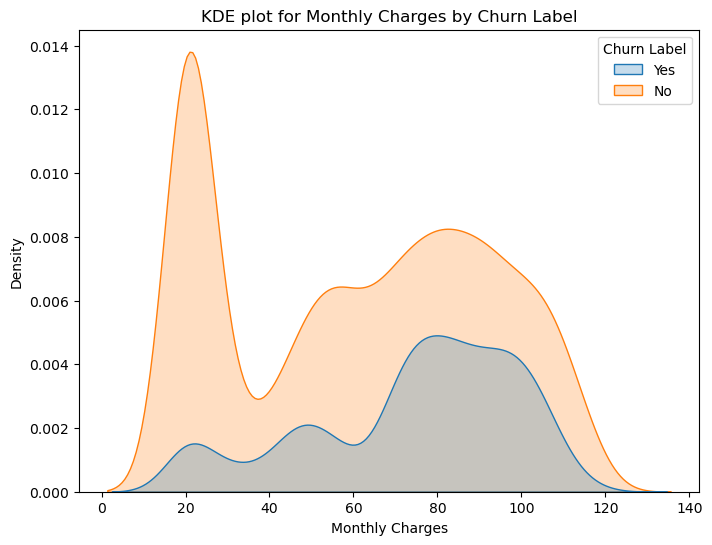

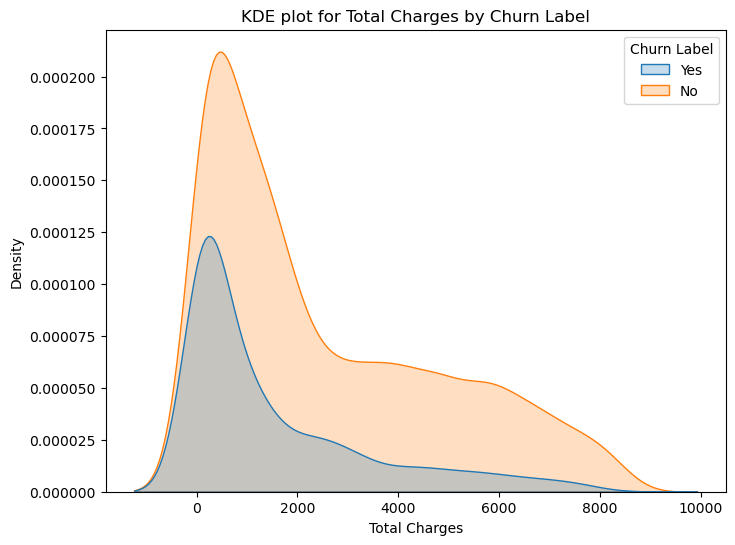

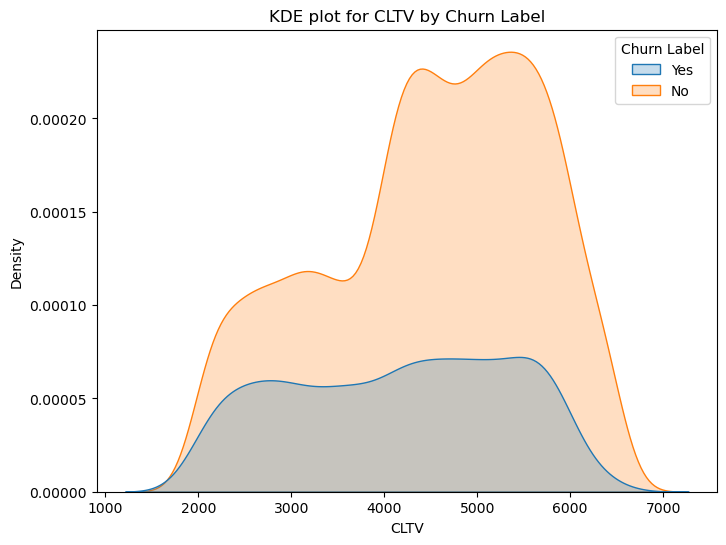

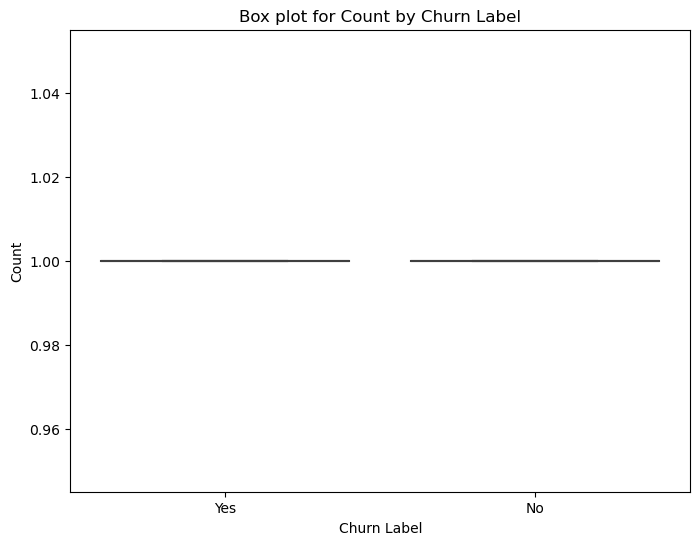

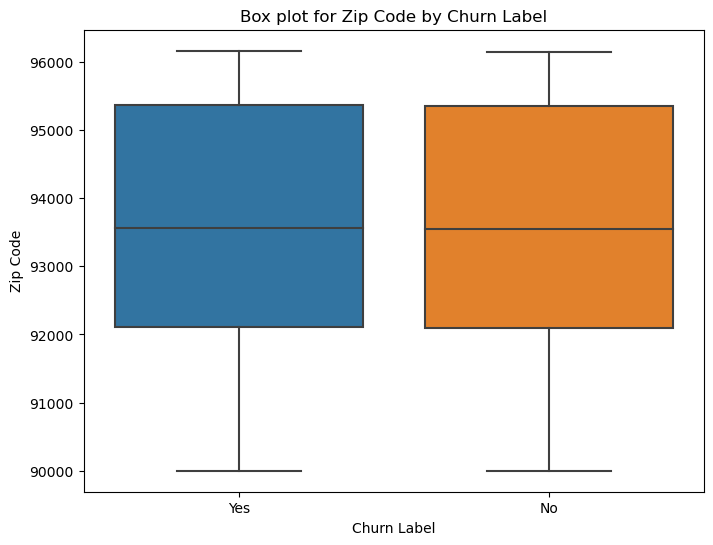

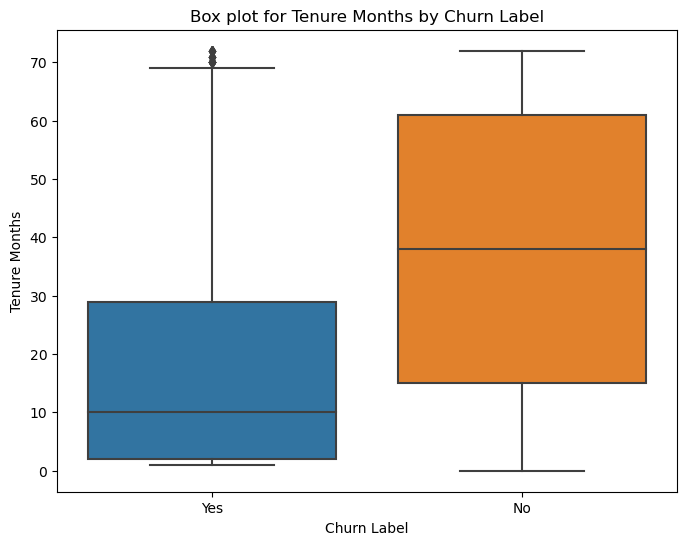

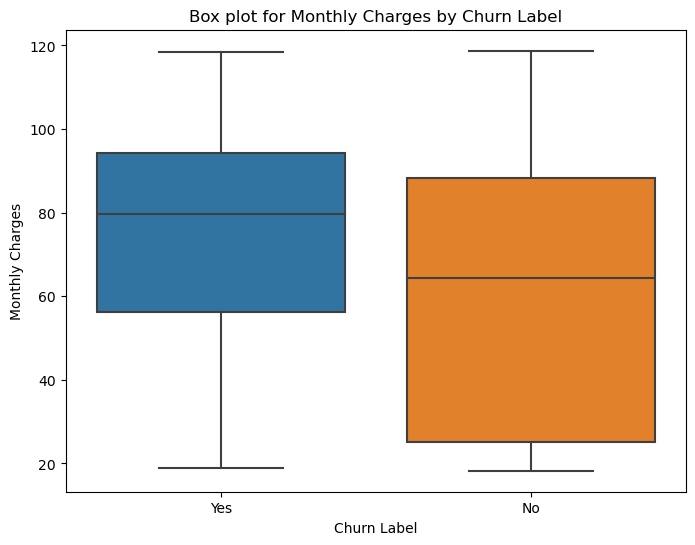

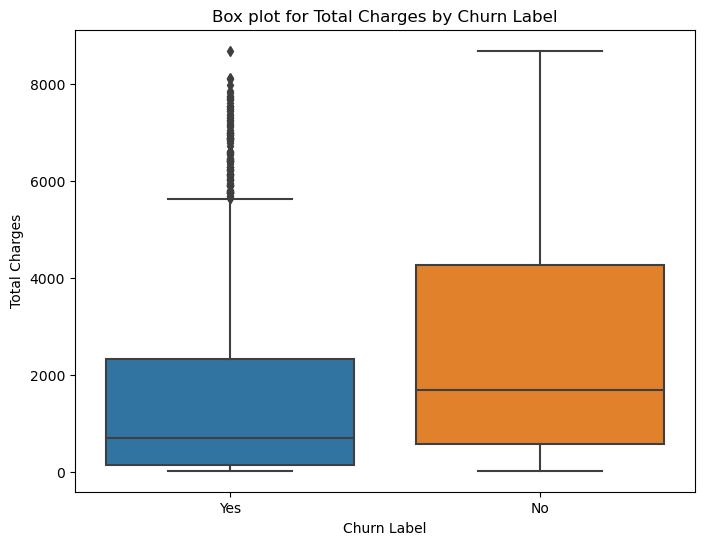

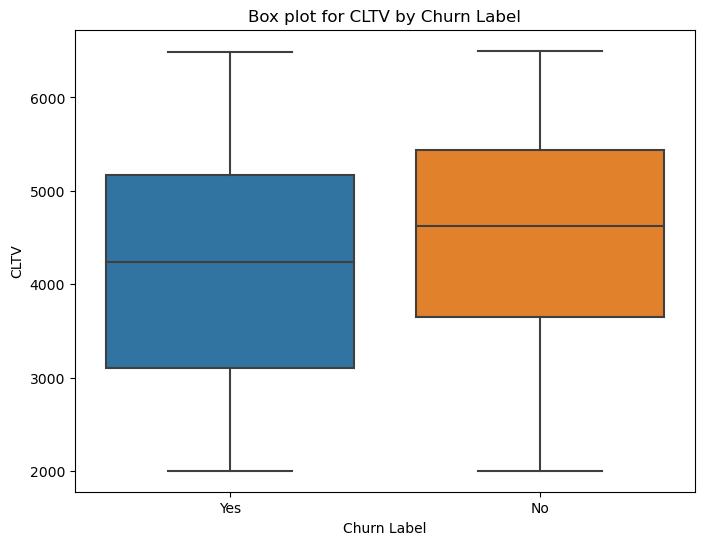

In [12]:
exclude_columns = ["Latitude", "Longitude", "Churn Value", "Churn Score"]
numeric_columns = [col for col in df.columns if col not in exclude_columns and df[col].dtype in ['int64', 'float64']]

# Analyze skewness of numeric columns
skewness = df[numeric_columns].skew()

# Visualize relationship with 'Churn Score' using regression plots
for column in numeric_columns:
    sns.regplot(x=column, y='Churn Score', data=df)
    plt.title(f'Regression plot for Churn Score vs {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Score')
    plt.show()

# Compare distributions by 'Churn Label' using KDE plots
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=column, hue='Churn Label', fill=True)
    plt.title(f'KDE plot for {column} by Churn Label')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

# Create box plots to assess spread and identify outliers
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn Label', y=column, data=df)
    plt.title(f'Box plot for {column} by Churn Label')
    plt.xlabel('Churn Label')
    plt.ylabel(column)
    plt.show()

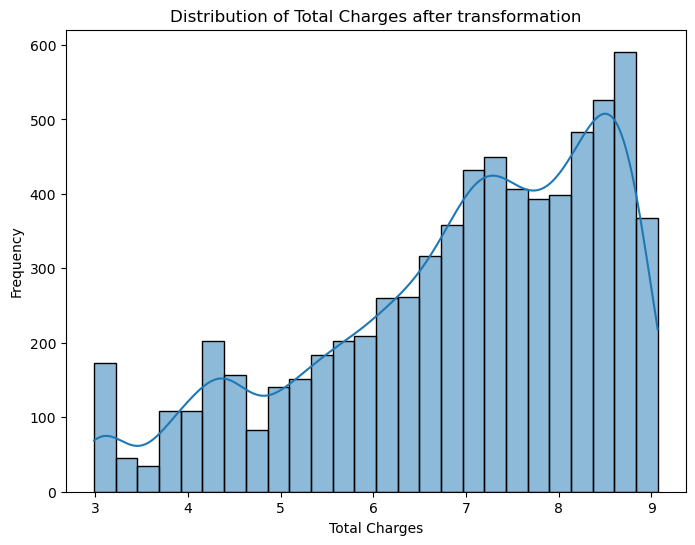

In [13]:
# Identify columns with skewness greater than 0.8
high_skew_columns = skewness[skewness > 0.8].index

# Apply logarithmic transformation to variables with high skewness
for column in high_skew_columns:
    df[column] = np.log1p(df[column])

# Visualize the transformed distributions
for column in high_skew_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column} after transformation')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['Phone Service'], df['Churn Label'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)

# ii) contingency table for the type of contract and churn
contract_churn_contingency = pd.crosstab(df['Contract'], df['Churn Label'])

# chi-square test for type of contract and churn
chi2_contract, p_contract, dof_contract, expected_contract = chi2_contingency(contract_churn_contingency)

# Print the results for type of contract
print("Chi-square statistic for type of contract:", chi2_contract)
print("p-value for type of contract:", p_contract)

# iii) Contingency table for Senior Citizen status and churn
senior_churn_contingency = pd.crosstab(df['Senior Citizen'], df['Churn Label'])

# Perform the chi-square test for Senior Citizen status and churn
chi2_senior, p_senior, dof_senior, expected_senior = chi2_contingency(senior_churn_contingency)

# Print the results for Senior Citizen status
print("Chi-square statistic for Senior Citizen status:", chi2_senior)
print("p-value for Senior Citizen status:", p_senior)


Chi-square statistic: 0.9150329892546948
p-value: 0.3387825358066928
Chi-square statistic for type of contract: 1184.5965720837926
p-value for type of contract: 5.863038300673391e-258
Chi-square statistic for Senior Citizen status: 159.42630036838742
p-value for Senior Citizen status: 1.510066805092378e-36


In [15]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Tenure Months', 'Monthly Charges', 'Total Charges']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df[columns_to_normalize].head())


   Tenure Months  Monthly Charges  Total Charges
0       0.027778         0.354229       0.280590
1       0.027778         0.521891       0.335724
2       0.111111         0.809950       0.612360
3       0.388889         0.861194       0.827818
4       0.680556         0.850249       0.910447


In [17]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df.drop(['Churn Label', 'Churn Value', 'Churn Score'], axis=1)
y = df['Churn Label']

# Split dataset into training set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5634, 30)
Shape of X_test: (1409, 30)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define your numeric and categorical features
numeric_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']
categorical_features = ['Gender', 'Internet Service', 'Contract', 'Paperless Billing', 'Payment Method']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_preprocessed, y_train)

# Print the logistic regression model
print("Logistic Regression Model:")
print(logistic_model)

# Print the coefficients and intercept
print("\nCoefficients:")
print(logistic_model.coef_)
print("\nIntercept:")
print(logistic_model.intercept_)


Logistic Regression Model:
LogisticRegression(max_iter=1000)

Coefficients:
[[-0.05712917  0.53232147 -0.89788297 -0.02861081 -0.01828549  0.76204162
  -0.91092432 -0.72806739 -1.87027844  0.46911131 -0.12217402  0.35670157
  -0.18659177]]

Intercept:
[-1.53211926]


In [23]:
# Predict on the test set
y_pred = logistic_model.predict(X_test_preprocessed)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1009
         Yes       0.68      0.51      0.58       400

    accuracy                           0.79      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



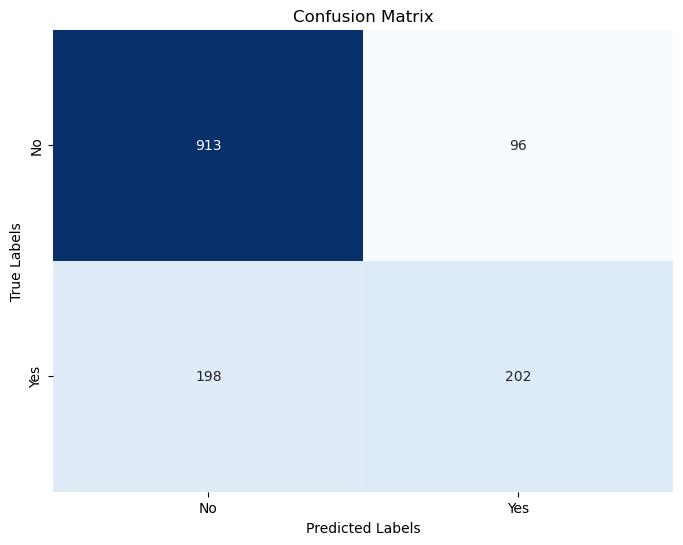

In [25]:
from sklearn.metrics import confusion_matrix

X_test_preprocessed = preprocessor.transform(X_test)

# Predict on the preprocessed test set
y_pred = logistic_model.predict(X_test_preprocessed)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=logistic_model.classes_, 
            yticklabels=logistic_model.classes_,
            cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
